In [1]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from time import time
import sys, os

In [2]:
TRAIN_PATH = "./data/train/images"
TEST_PATH  = "./data/test/images"
DIR_TRAIN = './data/train'
DIR_TEST = './data/test'

In [4]:
df = pd.read_csv('coord_test.csv')

In [5]:
df

file_name  width  height  width_scale  height_scale  id_face  \
0     296814969_3.jpg    846     846          512           512        0   
1     296814969_3.jpg    846     846          512           512        1   
2    2968560214_1.jpg    683    1024          512           767        0   
3    2968784797_1.jpg   4288    2848          770           512        0   
4     296961468_1.jpg   2304    2898          512           644        0   
..                ...    ...     ...          ...           ...      ...   
416  3260548295_2.jpg   1034    1034          512           512        0   
417  3261640996_1.jpg   1658    1658          512           512        0   
418  3261640996_1.jpg   1658    1658          512           512        1   
419  3262777136_1.jpg    685     836          512           624        0   
420  3266693323_1.jpg   2116    2116          512           512        0   

          top_x       top_y    bottom_x    bottom_y   point_0_x   point_0_y  \
0   -163.926163  136.748535   59.203026  392.848755  -87.683479  251.366211   
1    174.199463  117.195930  340.578430  335.628632  233.735458  207.822052   
2    105.508743   68.205978  564.507080  656.191284  210.464676  295.630035   
3     95.271729   63.879692  467.304077  622.007507  197.508682  295.107910   
4    196.603058  150.944214  428.003571  490.197540  280.547394  283.733368   
..          ...         ...         ...         ...         ...         ...   
416  164.889221  119.693436  329.228180  330.210510  202.233200  202.891769   
417  339.806061   75.218285  535.047302  302.276398  375.652039  194.003326   
418  169.759933  109.213890  338.835144  341.557220  217.641602  207.691147   
419  105.933708  110.512161  329.158661  385.652130  164.717316  205.195374   
420  175.036179  126.343697  334.353088  339.217407  239.171463  202.544357   

      point_1_x   point_1_y   point_2_x   point_2_y   point_3_x   point_3_y  \
0      7.742966  245.364655  -37.941895  289.454529  -91.050735  327.948242   
1    305.950256  200.907379  284.151367  254.243073  246.754974  288.320526   
2    436.917206  324.664124  286.423401  449.288361  197.499222  515.567261   
3    381.181122  284.387299  303.143158  401.069916  213.753662  496.491943   
4    388.383545  282.737396  350.666016  344.063354  289.621704  409.957458   
..          ...         ...         ...         ...         ...         ...   
416  278.966187  201.353760  233.353821  245.726776  208.354294  281.557465   
417  449.563873  149.978912  416.808105  214.661346  418.422180  265.658569   
418  292.645874  198.204010  263.778137  250.189148  228.302094  284.812744   
419  270.181549  221.018250  202.435394  270.251801  159.611679  311.371857   
420  309.306488  218.205933  275.478149  245.545868  231.013992  281.265137   

      point_4_x   point_4_y  
0      7.268028  321.540771  
1    308.156525  279.032867  
2    402.004395  539.210083  
3    368.701935  484.625397  
4    378.597351  406.312653  
..          ...         ...  
416  275.664124  281.071350  
417  489.521484  223.773865  
418  298.471802  276.050232  
419  241.657639  325.380493  
420  286.768219  295.092285  

[421 rows x 20 columns]

In [6]:
df['width_face'] = abs(df['bottom_x'] - df['top_x'])
df['height_face'] = abs(df['bottom_y'] - df['top_y'])
df["f_x"] = df['width']/df['width_scale']
df["f_y"] = df['height']/df['height_scale']

In [7]:
df['top_x'] = df['top_x']*df["f_x"]
df['bottom_x'] = df['bottom_x']*df["f_x"]
df['top_y'] = df['top_y']*df["f_y"]
df['bottom_y'] = df['bottom_y']*df["f_y"]

In [8]:
df['width_face'] = abs(df['bottom_x'] - df['top_x'])
df['height_face'] = abs(df['bottom_y'] - df['top_y'])

In [9]:
df['centre_face_x'] = df['top_x'] + df['width_face']//2
df['centre_face_y'] = df['top_y'] + df['height_face']//2

In [11]:
df['area_face'] = df['width_face'] * df['height_face']

In [23]:
df['dist_centre'] = ((df['centre_face_x'] - df['width']/2)**2 + (df['centre_face_y'] - df['height']/2)**2)**0.5

In [24]:
df = df.groupby(['file_name']).apply(lambda x: x.sort_values(["dist_centre"])).reset_index(drop=True)

In [25]:
df

file_name  width  height  width_scale  height_scale  id_face  \
0     296814969_3.jpg    846     846          512           512        1   
1     296814969_3.jpg    846     846          512           512        0   
2    2968560214_1.jpg    683    1024          512           767        0   
3    2968784797_1.jpg   4288    2848          770           512        0   
4     296961468_1.jpg   2304    2898          512           644        0   
..                ...    ...     ...          ...           ...      ...   
416  3260548295_2.jpg   1034    1034          512           512        0   
417  3261640996_1.jpg   1658    1658          512           512        1   
418  3261640996_1.jpg   1658    1658          512           512        0   
419  3262777136_1.jpg    685     836          512           624        0   
420  3266693323_1.jpg   2116    2116          512           512        0   

           top_x       top_y     bottom_x     bottom_y  ...   point_4_x  \
0     287.837394  193.647963   562.752640   554.573872  ...  308.156525   
1    -270.862370  225.955587    97.823750   649.121185  ...    7.268028   
2     140.747015   91.059872   753.043624   876.062419  ...  402.004395   
3     530.552171  355.330787  2602.337510  3459.916759  ...  368.701935   
4     884.713760  679.248962  1926.016068  2205.888931  ...  378.597351   
..           ...         ...          ...          ...  ...         ...   
416   332.998935  241.724634   664.886598   666.870445  ...  275.664124   
417   549.730410  353.665292  1097.243494  1106.058343  ...  298.471802   
418  1100.387595  243.577961  1732.633647   978.855991  ...  489.521484   
419   141.727715  148.057960   440.378287   516.674969  ...  241.657639   
420   723.391707  522.154809  1381.818623  1401.921941  ...  286.768219   

      point_4_y   width_face  height_face       f_x       f_y  centre_face_x  \
0    279.032867   274.915247   360.925908  1.652344  1.652344     424.837394   
1    321.540771   368.686120   423.165597  1.652344  1.652344     -86.862370   
2    539.210083   612.296609   785.002546  1.333984  1.335072     446.747015   
3    484.625397  2071.785339  3104.585972  5.568831  5.562500    1565.552171   
4    406.312653  1041.302307  1526.639969  4.500000  4.500000    1404.713760   
..          ...          ...          ...       ...       ...            ...   
416  281.071350   331.887663   425.145811  2.019531  2.019531     497.998935   
417  276.050232   547.513084   752.393050  3.238281  3.238281     822.730410   
418  223.773865   632.246051   735.278030  3.238281  3.238281    1416.387595   
419  325.380493   298.650571   368.617010  1.337891  1.339744     290.727715   
420  295.092285   658.426916   879.767132  4.132812  4.132812    1052.391707   

     centre_face_y     area_face  dist_centre  
0       373.647963  9.922404e+04    49.386228  
1       436.955587  1.560153e+05   510.053326  
2       483.059872  4.806544e+05   109.153402  
3      1907.330787  6.432036e+06   753.797413  
4      1442.248962  1.589694e+06   252.803918  
..             ...           ...          ...  
416     453.724634  1.411006e+05    66.066727  
417     729.665292  4.119450e+05    99.532366  
418     610.577961  4.648766e+05   626.683632  
419     332.057960  1.100877e+05   100.331470  
420     961.154809  5.792624e+05    97.007443  

[421 rows x 28 columns]

In [26]:
df_clear = df.drop_duplicates('file_name', keep ='first')

In [29]:
df_clear[['file_name', 'width', 'height', 'top_x', 'top_y', 'bottom_x', 'bottom_y']].to_csv('clear_coord_test.csv', index=False)

In [21]:
row = df.loc[26]
img = Image.open(os.path.join(TEST_PATH, row['file_name']))
draw = ImageDraw.Draw(img)
box = [row['top_x'], row['top_y'], row['bottom_x'], row['bottom_y']]
img_crop = img.crop(box)
point_0 = [row["point_0_x"], row["point_0_y"]]
point_1 = [row["point_1_x"], row["point_1_y"]]
point_2 = [row["point_2_x"], row["point_2_y"]]
point_3 = [row["point_3_x"], row["point_3_y"]]
point_4 = [row["point_4_x"], row["point_4_y"]]

point_centre = [row["centre_face_x"], row["centre_face_y"]]

r = 5
x, y = point_0
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_1
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_2
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_3
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_4
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_centre
draw.ellipse((x-r, y-r, x+r, y+r), fill=(0,0,255,0))

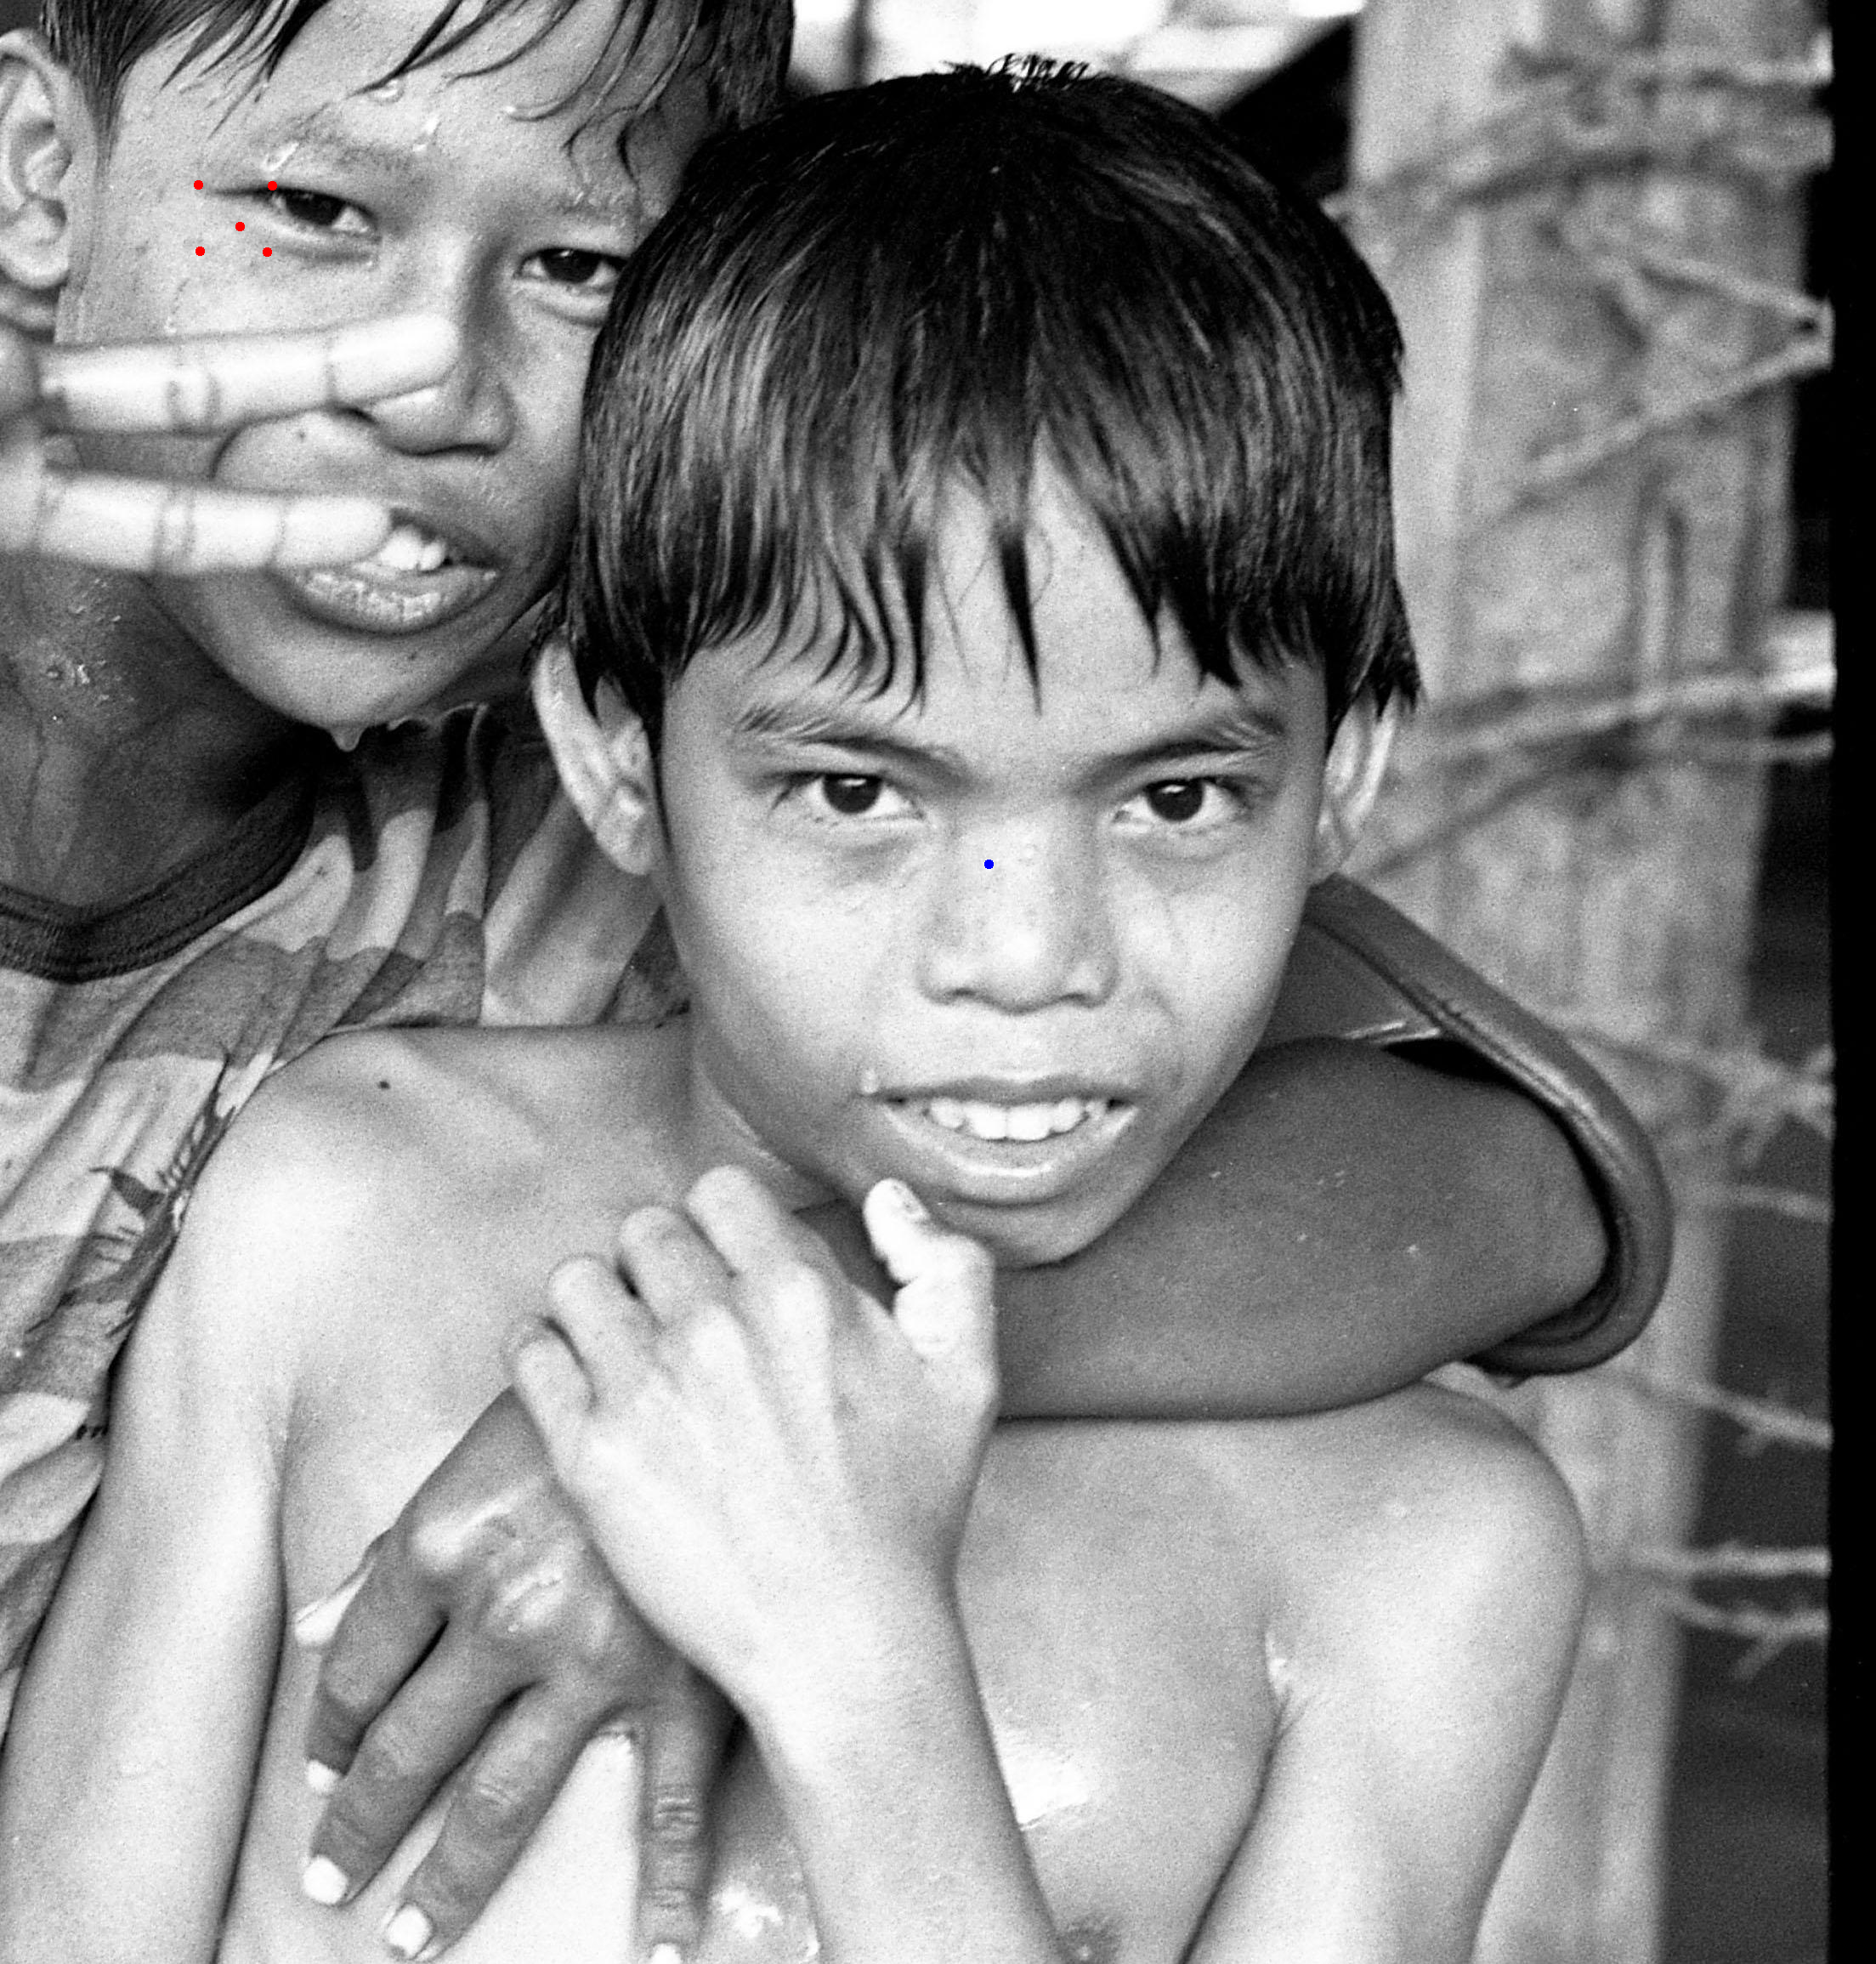

In [22]:
img